# Lesson 3: Balance of Energy

<b>Tags:</b> #mechanics #energy #balanceofenergy<br>
<b>Author:</b> Syed Talha Tirmizi <br>
<b>Last update:</b> 2025-12-24 (Created 2025-12-24) <br>

## Description

Just as we established the balance of linear momentum for mechanical problems, we must establish the **Balance of Energy** (First Law of Thermodynamics) for thermal problems.

### 1.1 Global Balance of Energy
The First Law of Thermodynamics states that the time rate of change of the total internal energy $E$ inside a body $\Omega$ is balanced by:
1.  The heat energy produced internally by a source $s$ (e.g., chemical reactions).
2.  The heat flux $\boldsymbol{q}$ leaving the body through the boundary $\partial \Omega$.
3.  The mechanical power $P$ expended on the body.

Mathematically, this is expressed as:

$$
\frac{d}{dt}E = \int_{\Omega} s \, dV - \int_{\partial \Omega} \boldsymbol{q} \cdot \boldsymbol{n} \, dS + P
$$

Using the **Divergence Theorem**, we convert the surface integral (flux) into a volume integral:

$$
\int_{\partial \Omega} \boldsymbol{q} \cdot \boldsymbol{n} \, dS = \int_{\Omega} \operatorname{div} \boldsymbol{q} \, dV
$$

### 1.2 Local Balance of Energy (Strong Form)
Since the global balance of energy must hold not just for the entire body $\Omega$, but for **any arbitrary sub-body** $\omega \subset \Omega$, the integrand itself must be zero at every point. This yields the general **Local Balance of Energy**:

$$
\dot{e} = \dot{W} + s - \operatorname{div} \boldsymbol{q}
$$

Where:
* $\dot{e}$ is the rate of change of internal energy density.
* $\dot{W}$ is the mechanical power density (stress power).
* $s$ is the heat source density.
* $\operatorname{div} \boldsymbol{q}$ is the divergence of the heat flux.

**Simplification for Pure Heat Conduction:**
For a purely thermal problem, we assume no mechanical work is being done ($\dot{W} \approx 0$). We also define the internal energy density using density $\rho$ and specific heat capacity $c_v$ as $e = \rho c_v T$.

Substituting these into the general equation gives us the governing equation for temperature evolution:

$$
\rho c_v \dot{T} = s - \operatorname{div} \boldsymbol{q}
$$

### 1.3 Constitutive Law: Fourier's Law
To solve this equation, we relate the heat flux $\boldsymbol{q}$ to the temperature field $T$. We use **Fourier's Law**, which states that heat flows from hot to cold regions proportional to the temperature gradient:

$$
\boldsymbol{q} = -\kappa \nabla T
$$

Substituting this back into the balance equation yields the **Heat Equation**:

$$
\rho c_v \dot{T} = \operatorname{div}(\kappa \nabla T) + s
$$

### 1.4 The 1D Steady-State Problem
For a static problem (time derivatives are zero, $\dot{T}=0$) in one dimension (1D) with constant thermal conductivity $\kappa$, the equation reduces to the **Poisson Equation**:

$$
\kappa \frac{d^2T}{dx^2} + s = 0
$$


### 1.5 Analytical Solution Derivation

We wish to find the exact function $T(x)$ that satisfies the ODE above.

**1. Integrate once:**
Rearranging the governing equation to $T''(x) = -\frac{s}{\kappa}$ and integrating with respect to $x$:

$$
T'(x) = -\frac{s}{\kappa}x + C_1
$$

**2. Integrate again:**

$$
T(x) = -\frac{s}{2\kappa}x^2 + C_1 x + C_2
$$

**3. Apply Boundary Conditions (Dirichlet):**
We assume fixed temperatures at both ends of the domain of length $L$:
* $T(0) = T_{\text{left}}$
* $T(L) = T_{\text{right}}$

Applying $x=0$:
$$
T(0) = 0 + 0 + C_2 \implies C_2 = T_{\text{left}}
$$

Applying $x=L$:
$$
T_{\text{right}} = -\frac{s}{2\kappa}L^2 + C_1 L + T_{\text{left}}
$$

Solving for $C_1$:
$$
C_1 = \frac{T_{\text{right}} - T_{\text{left}}}{L} + \frac{sL}{2\kappa}
$$

**4. Final Exact Solution:**
Substituting constants $C_1$ and $C_2$ back into the general solution gives us the specific exact solution used in the Python code below:

$$
T(x) = -\frac{s}{2\kappa}x^2 + \left( \frac{T_{\text{right}} - T_{\text{left}}}{L} + \frac{sL}{2\kappa} \right) x + T_{\text{left}}
$$

# Setup

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Geometry and Properties

In [13]:
# Parameters 
L = 1.0          # Length of domain
kappa = 10.0     # Thermal conductivity
s = 800.0        # Heat source density
T_left = 100.0   # Boundary Temp 1
T_right = 200.0  # Boundary Temp 2

# Create points to plot
x_values = np.linspace(0, L, 100)
T_values = exact_heat_solution(x_values, L, kappa, s, T_left, T_right)

# Calculation

In [14]:
def exact_heat_solution(x, L, kappa, s, T_left, T_right):
    # Calculate constants based on Boundary Conditions
    C2 = T_left
    C1 = (T_right - T_left) / L + (s * L) / (2 * kappa)
    
    # Compute T
    T = -(s / (2 * kappa)) * x**2 + C1 * x + C2
    return T

# Visualizations

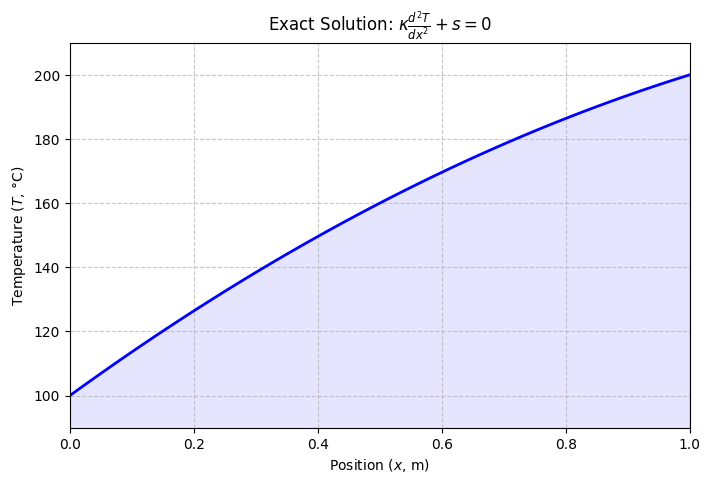

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(x_values, T_values, color='blue', linewidth=2, label='Exact Analytical Solution')
plt.fill_between(x_values, T_values, color='blue', alpha=0.1) 
plt.title(r'Exact Solution: $\kappa \frac{d^2T}{dx^2} + s = 0$')
plt.xlabel('Position ($x$, m)')
plt.ylabel('Temperature ($T$, °C)')
plt.xlim(0, L)
plt.ylim(min(T_values) - 10, max(T_values) + 10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Note:**<br>
The exact solution contains two distinct parts that compete with each other:

$$
T(x) = \underbrace{-\frac{s}{2\kappa}x^2}_{\text{Curvature (Parabola)}} + \underbrace{C_1 x + C_2}_{\text{Linear Gradient}}
$$

1.  **The Source Term ($s$):** This term is responsible for the **curvature** of the temperature profile.
    * If $s > 0$ (heat generation), the curve bulges upward (concave down).
    * If $s = 0$ (no internal heat), the quadratic term vanishes, and the temperature profile becomes a **straight line**. This reduces the *Poisson Equation* ($\kappa T'' = -s$) to the *Laplace Equation* ($\kappa T'' = 0$).

2.  **The Conductivity ($\kappa$):** This term resists the curvature.
    * A very high thermal conductivity ($\kappa$) tends to "smooth out" the temperature differences, making the profile flatter.
    * The magnitude of the "bulge" in the center is directly proportional to the ratio $s / \kappa$.

<div style="font-family: Arial, sans-serif; font-size: 10pt; color: #333F48; border-top: 1px solid #ccc; padding-top: 10px; margin-top: 20px;">
    <span style="font-weight: bold; color: #bf5700; text-transform: uppercase;">Syed Talha Tirmizi</span>, PhD Student <br>
    The University of Texas at Austin | Hildebrand Department of Petroleum & Geosystem Engineering | <a href="syedtalha.tirmizi@austin.utexas.edu" style="color: #bf5700; text-decoration: none;">syedtalha.tirmizi@austin.utexas.edu</a>
</div>